# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

### Import Libraries and Read in Data File

In [110]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Tediously manipulate column names

In [112]:
scrubbed_column_names = []
for col in df.columns:
    #replace spaces and dashes with underscore
    temp_string = col.replace(' ','_').replace('-','_').replace('+','plus')
    #remove anything else that is not a number, letter, or underscore
    final_string = ''.join([i for i in temp_string if (i.isalpha() or i.isdigit() or i=='_')])
    scrubbed_column_names.append(final_string)
df.columns = scrubbed_column_names

In [113]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Train Test Split

In [67]:
#Set variables for column names oucome and x_cols
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [8]:
X = df.loc[:,x_cols]
y = df.list_price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [60]:
#Concat to make train and test dataframes
df_train = pd.concat([y_train,X_train],axis=1)
df_test = pd.concat([y_test,X_test],axis=1)

### Build Initial Regression Model

In [61]:
#Make the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     580.8
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:21:49   Log-Likelihood:                -43152.
No. Observations:                8696   AIC:                         8.649e+04
Df Residuals:                    8602   BIC:                         8.716e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.1049      1.593     40.857      0.000      61.981      68.228
piece_count                                         73.8252      0.865     85.301      0.000      72.129      75.522
num_reviews                                          6.1813      0.662      9.331      0.000       4.883       7.480
play_star_rating                                     5.1017      0.605      8.437      0.000       3.916       6.287
star_rating                                         -1.5089      0.681     -2.217      0.027      -2.843      -0.175
val_star_rating                                     -8.6860      0.611    -14.225      0.000      -9.883      -7.489
ages_10plus                                        121.0057      6.142     19.703      0.000     108.967     133.045
ages_10_14                                         -25.2750      8.506     -2.971      0.003     -41.949      -8.601
ages_10_16                                         -11.3622      3.735     -3.042      0.002     -18.684      -4.040
ages_10_21                                          57.6644      6.971      8.272      0.000      44.000      71.329
ages_11_16                                         -18.6421      5.488     -3.397      0.001     -29.401      -7.883
ages_12plus                                         72.6330      5.311     13.677      0.000      62.223      83.043
ages_12_16                                         -55.5941      6.217     -8.943      0.000     -67.780     -43.408
ages_14plus                                         29.0857      3.808      7.638      0.000      21.621      36.551
ages_16plus                                         32.4116      5.711      5.676      0.000      21.217      43.606
ages_1_3                                            -9.8679      2.256     -4.373      0.000     -14.291      -5.445
ages_1_5                                            -3.9684      2.922     -1.358      0.174      -9.697       1.760
ages_2_5                                            15.1337      1.595      9.487      0.000      12.007      18.261
ages_4plus                                         -18.2968      6.071     -3.014      0.003     -30.198      -6.395
ages_4_7                                            -5.8800      3.276     -1.795      0.073     -12.301       0.541
ages_4_99                                           -3.6249      3.459     -1.048      0.295     -10.404       3.155
ages_5plus                                         -10.5297      3.353     -3.141      0.002     -17.102      -3.958
ages_5_12                                          -37.4011      2.885    -12.966      0.000     -43.056     -31.747
ages_5_8                                 

### Stepwise Selection Function from earlier lessons

In [29]:
def stepwise_selection(X, y,
                      initial_list=[],
                      threshold_in=0.01,
                      threshold_out = 0.05,
                      verbose=True):
   """ Perform a forward-backward feature selection
   based on p-value from statsmodels.api.OLS
   Arguments:
       X - pandas.DataFrame with candidate features
       y - list-like with the target
       initial_list - list of features to start with (column names of X)
       threshold_in - include a feature if its p-value < threshold_in
       threshold_out - exclude a feature if its p-value > threshold_out
       verbose - whether to print the sequence of inclusions and exclusions
   Returns: list of selected features
   Always set threshold_in < threshold_out to avoid infinite looping.
   See https://en.wikipedia.org/wiki/Stepwise_regression for the details
   """
   included = list(initial_list)
   while True:
       changed=False
       # forward step
       excluded = list(set(X.columns)-set(included))
       new_pval = pd.Series(index=excluded)
       for new_column in excluded:
           model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
           new_pval[new_column] = model.pvalues[new_column]
       best_pval = new_pval.min()
       if best_pval < threshold_in:
           best_feature = new_pval.idxmin()
           included.append(best_feature)
           changed=True
           if verbose:
               print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

       # backward step
       model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
       # use all coefs except intercept
       pvalues = model.pvalues.iloc[1:]
       worst_pval = pvalues.max() # null if pvalues is empty
       if worst_pval > threshold_out:
           changed=True
           worst_feature = pvalues.argmax()
           included.remove(worst_feature)
           if verbose:
               print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
       if not changed:
           break
   return included

In [37]:
stepwise_result = stepwise_selection(X_train,y_train,verbose=False)

/Users/dennistrimarchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


In [38]:
len(stepwise_result)

41

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [63]:
columns_to_drop = []
for item in zip(model.pvalues.index,model.pvalues):
    if item[1] >= 0.05:
        columns_to_drop.append(item[0])

In [68]:
[x_cols.remove(col) for col in columns_to_drop];

In [69]:
len(x_cols)

73

In [70]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     761.2
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:22:58   Log-Likelihood:                -43160.
No. Observations:                8696   AIC:                         8.646e+04
Df Residuals:                    8624   BIC:                         8.697e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.4706      1.547     41.034      0.000      60.439      66.503
piece_count                                         73.9539      0.851     86.902      0.000      72.286      75.622
num_reviews                                          6.3049      0.656      9.609      0.000       5.019       7.591
play_star_rating                                     5.2553      0.592      8.882      0.000       4.095       6.415
star_rating                                         -1.4575      0.665     -2.191      0.028      -2.761      -0.154
val_star_rating                                     -8.7174      0.585    -14.901      0.000      -9.864      -7.571
ages_10plus                                        129.1217      7.189     17.960      0.000     115.029     143.214
ages_10_14                                         -18.2849      8.928     -2.048      0.041     -35.786      -0.784
ages_10_16                                          -4.8081      3.737     -1.287      0.198     -12.133       2.517
ages_10_21                                          66.0916      7.854      8.415      0.000      50.695      81.488
ages_11_16                                         -12.4134      5.451     -2.277      0.023     -23.098      -1.729
ages_12plus                                         79.8356      6.449     12.379      0.000      67.194      92.477
ages_12_16                                         -49.0754      6.650     -7.380      0.000     -62.111     -36.040
ages_14plus                                         35.7960      4.664      7.675      0.000      26.653      44.939
ages_16plus                                         38.4785      6.583      5.846      0.000      25.575      51.382
ages_1_3                                            -2.5826      2.941     -0.878      0.380      -8.347       3.182
ages_2_5                                            22.1280      1.954     11.325      0.000      18.298      25.958
ages_4plus                                         -15.6447      9.296     -1.683      0.092     -33.868       2.578
ages_5plus                                          -7.9669      3.363     -2.369      0.018     -14.560      -1.374
ages_5_12                                          -29.5045      2.672    -11.041      0.000     -34.743     -24.266
ages_6plus                                         -20.4138      5.363     -3.806      0.000     -30.926      -9.901
ages_6_12                                          -15.7349      1.895     -8.301      0.000     -19.450     -12.019
ages_6_14                                            0.0242      3.890      0.006      0.995      -7.600       7.649
ages_7plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [72]:
#Your code here
columns_to_drop = []
for item in zip(model.pvalues.index,model.pvalues):
    if item[1] >= 0.05:
        columns_to_drop.append(item[0])

[x_cols.remove(col) for col in columns_to_drop];
len(x_cols)

65

In [73]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

In [74]:
columns_to_drop = []
for item in zip(model.pvalues.index,model.pvalues):
    if item[1] >= 0.05:
        columns_to_drop.append(item[0])

[x_cols.remove(col) for col in columns_to_drop];
len(x_cols)

62

In [75]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

In [76]:
columns_to_drop = []
for item in zip(model.pvalues.index,model.pvalues):
    if item[1] >= 0.05:
        columns_to_drop.append(item[0])

[x_cols.remove(col) for col in columns_to_drop];
len(x_cols)

61

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [79]:
#Your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[stepwise_result]
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_result = list(zip(stepwise_result,vif))

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [80]:
x_cols = [result[0] for result in vif_result if result[1] < 5]

In [82]:
len(x_cols)

37

In [90]:
#Your code here
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_train).fit()

In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1307.
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:51:07   Log-Likelihood:                -43588.
No. Observations:                8696   AIC:                         8.725e+04
Df Residuals:                    8658   BIC:                         8.752e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6970      0.820     77.714      0.000      62.090      65.304
piece_count                                         76.7850      0.638    120.425      0.000      75.535      78.035
theme_name_SERIOUS_PLAY                            198.6682      4.752     41.807      0.000     189.353     207.983
theme_name_Creator_Expert                          -84.4480      3.194    -26.439      0.000     -90.709     -78.187
val_star_rating                                    -10.8823      0.475    -22.931      0.000     -11.813      -9.952
ages_2_5                                            25.1200      1.619     15.513      0.000      21.946      28.294
theme_name_Star_Wars                                 7.4660      1.347      5.544      0.000       4.826      10.106
ages_14plus                                         28.7421      3.418      8.410      0.000      22.043      35.442
review_difficulty_Average                           13.2541      0.984     13.472      0.000      11.326      15.183
review_difficulty_Challenging                       26.9077      1.956     13.758      0.000      23.074      30.742
play_star_rating                                     4.7843      0.475     10.073      0.000       3.853       5.715
theme_name_BOOST                                    74.5167      9.214      8.087      0.000      56.454      92.579
country_CA                                         -13.5898      1.597     -8.508      0.000     -16.721     -10.459
ages_12_16                                         -55.6536      6.262     -8.887      0.000     -67.929     -43.378
country_US                                         -11.0750      1.581     -7.004      0.000     -14.175      -7.975
country_DN                                         -12.3323      1.833     -6.730      0.000     -15.924      -8.740
theme_name_THE_LEGO_NINJAGO_MOVIE                  -19.8655      2.257     -8.800      0.000     -24.290     -15.440
theme_name_Ideas                                   -41.8539      4.203     -9.959      0.000     -50.092     -33.616
num_reviews                                          4.2957      0.589      7.290      0.000       3.141       5.451
theme_name_Indoraptor_Rampage_at_Lockwood_Estate    48.1926      8.672      5.557      0.000      31.193      65.192
theme_name_Classic                                 -17.4408      2.377     -7.338      0.000     -22.100     -12.782
ages_9plus                                          21.7711     10.053      2.166      0.030       2.064      41.478
ages_10_21                                          45.5550      3.202     14.227      0.000      39.278      51.832
theme_name_Friends                       

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

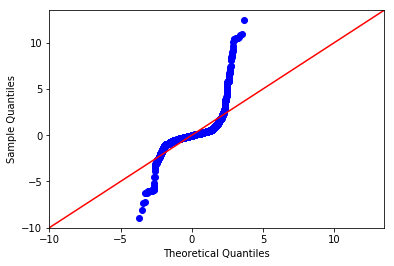

In [85]:
# Your code here
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

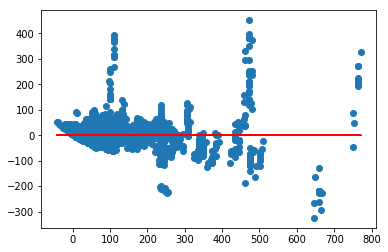

In [95]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(df_train[x_cols]), model.resid)
plt.plot(model.predict(df_train[x_cols]), [0 for i in range(len(df_train))],color='red')

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

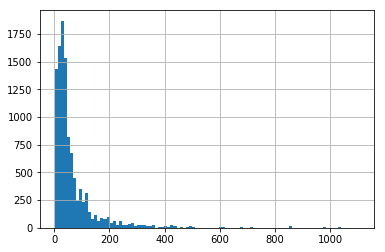

In [103]:
#Your code here
df[outcome].hist(bins=100)

In [99]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [114]:
df[df[outcome] < 450]
orig_tot = len(df)
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     610.5
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:03:37   Log-Likelihood:                -5676.9
No. Observations:                8152   AIC:                         1.143e+04
Df Residuals:                    8114   BIC:                         1.170e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4978      0.011    308.715      0.000       3.476       3.520
piece_count                                          0.5577      0.009     62.508      0.000       0.540       0.575
theme_name_SERIOUS_PLAY                              0.6004      0.069      8.743      0.000       0.466       0.735
theme_name_Creator_Expert                           -0.0312      0.043     -0.727      0.468      -0.115       0.053
val_star_rating                                     -0.1733      0.007    -26.290      0.000      -0.186      -0.160
ages_2_5                                             0.3323      0.023     14.750      0.000       0.288       0.377
theme_name_Star_Wars                                 0.1736      0.019      9.286      0.000       0.137       0.210
ages_14plus                                          0.4705      0.048      9.779      0.000       0.376       0.565
review_difficulty_Average                            0.5303      0.014     39.047      0.000       0.504       0.557
review_difficulty_Challenging                        0.5945      0.027     22.080      0.000       0.542       0.647
play_star_rating                                     0.1167      0.007     17.676      0.000       0.104       0.130
theme_name_BOOST                                     1.0348      0.155      6.673      0.000       0.731       1.339
country_CA                                          -0.3047      0.022    -13.966      0.000      -0.348      -0.262
ages_12_16                                           0.0685      0.091      0.756      0.449      -0.109       0.246
country_US                                          -0.2892      0.022    -13.268      0.000      -0.332      -0.246
country_DN                                          -0.1706      0.026     -6.607      0.000      -0.221      -0.120
theme_name_THE_LEGO_NINJAGO_MOVIE                   -0.0682      0.032     -2.133      0.033      -0.131      -0.006
theme_name_Ideas                                     0.2857      0.057      5.010      0.000       0.174       0.397
num_reviews                                         -0.0441      0.008     -5.528      0.000      -0.060      -0.028
theme_name_Indoraptor_Rampage_at_Lockwood_Estate     1.0785      0.123      8.783      0.000       0.838       1.319
theme_name_Classic                                  -0.6472      0.033    -19.890      0.000      -0.711      -0.583
ages_9plus                                           0.1328      0.131      1.010      0.312      -0.125       0.390
ages_10_21                                           0.5035      0.042     11.870      0.000       0.420       0.587
theme_name_Friends                       

Normality Check again

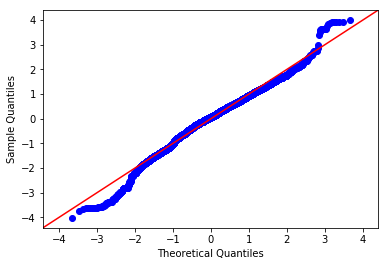

In [115]:
fig = sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True)

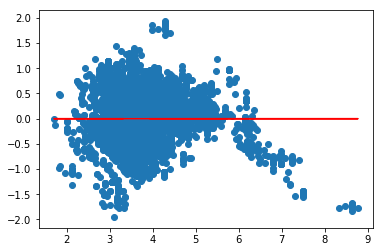

In [117]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))],color='red')

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 